In [ ]:
import os
import seaborn as sns
import pandas as pd

import scripts
from scripts.data_handler import HTRU2DataHandler
from scripts.config import DataConfig
from scripts.eda import compute_correlation_matrix

In [ ]:
# Data handler initialization
cfg = DataConfig()
data_handler = HTRU2DataHandler(cfg)

In [ ]:
if len(os.listdir(cfg.data_dir)) == 1:
    data_handler.download_kaggle()
else:
    print("Data already downloaded.")

df = data_handler.load()

Data already downloaded.
📂 Loading data...
✅ Loaded 17897 rows.


In [ ]:
df = data_handler.preprocess()

⚙️  Preprocessing data...
✅ Processing complete.


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.head()

,ip_mean,ip_std,ip_kurtosis,ip_skewness,dm_mean,dm_std,dm_kurtosis,dm_skewness,signal
0,102.508,58.882,0.465,-0.515,1.677,14.860,10.576,127.394,0
1,103.016,39.342,0.323,1.051,3.121,21.745,7.736,63.172,0
2,136.750,57.178,-0.068,-0.636,3.643,20.959,6.896,53.594,0
3,88.727,40.672,0.601,1.123,1.179,11.469,14.270,252.567,0
4,93.570,46.698,0.532,0.417,1.636,14.545,10.622,131.394,0


In [ ]:
features = df.columns[(df.columns != "signal")].tolist()
numerical_cols = df[features].select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical columns:", numerical_cols)

Numerical columns: ['ip_mean', 'ip_std', 'ip_kurtosis', 'ip_skewness', 'dm_mean', 'dm_std', 'dm_kurtosis', 'dm_skewness']


Maximum correlation values:
ip_mean: 0.55
ip_std: 0.55
ip_kurtosis: 0.95
ip_skewness: 0.95
dm_mean: 0.80
dm_std: 0.80
dm_kurtosis: 0.92
dm_skewness: 0.92
signal: 0.79


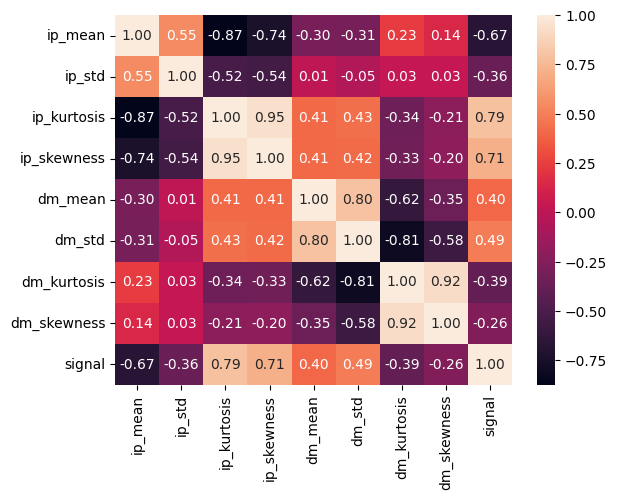

In [ ]:
compute_correlation_matrix(df, df.columns.tolist())

In [ ]:
# Plot target distribution
sns.countplot(x='signal', data=df)

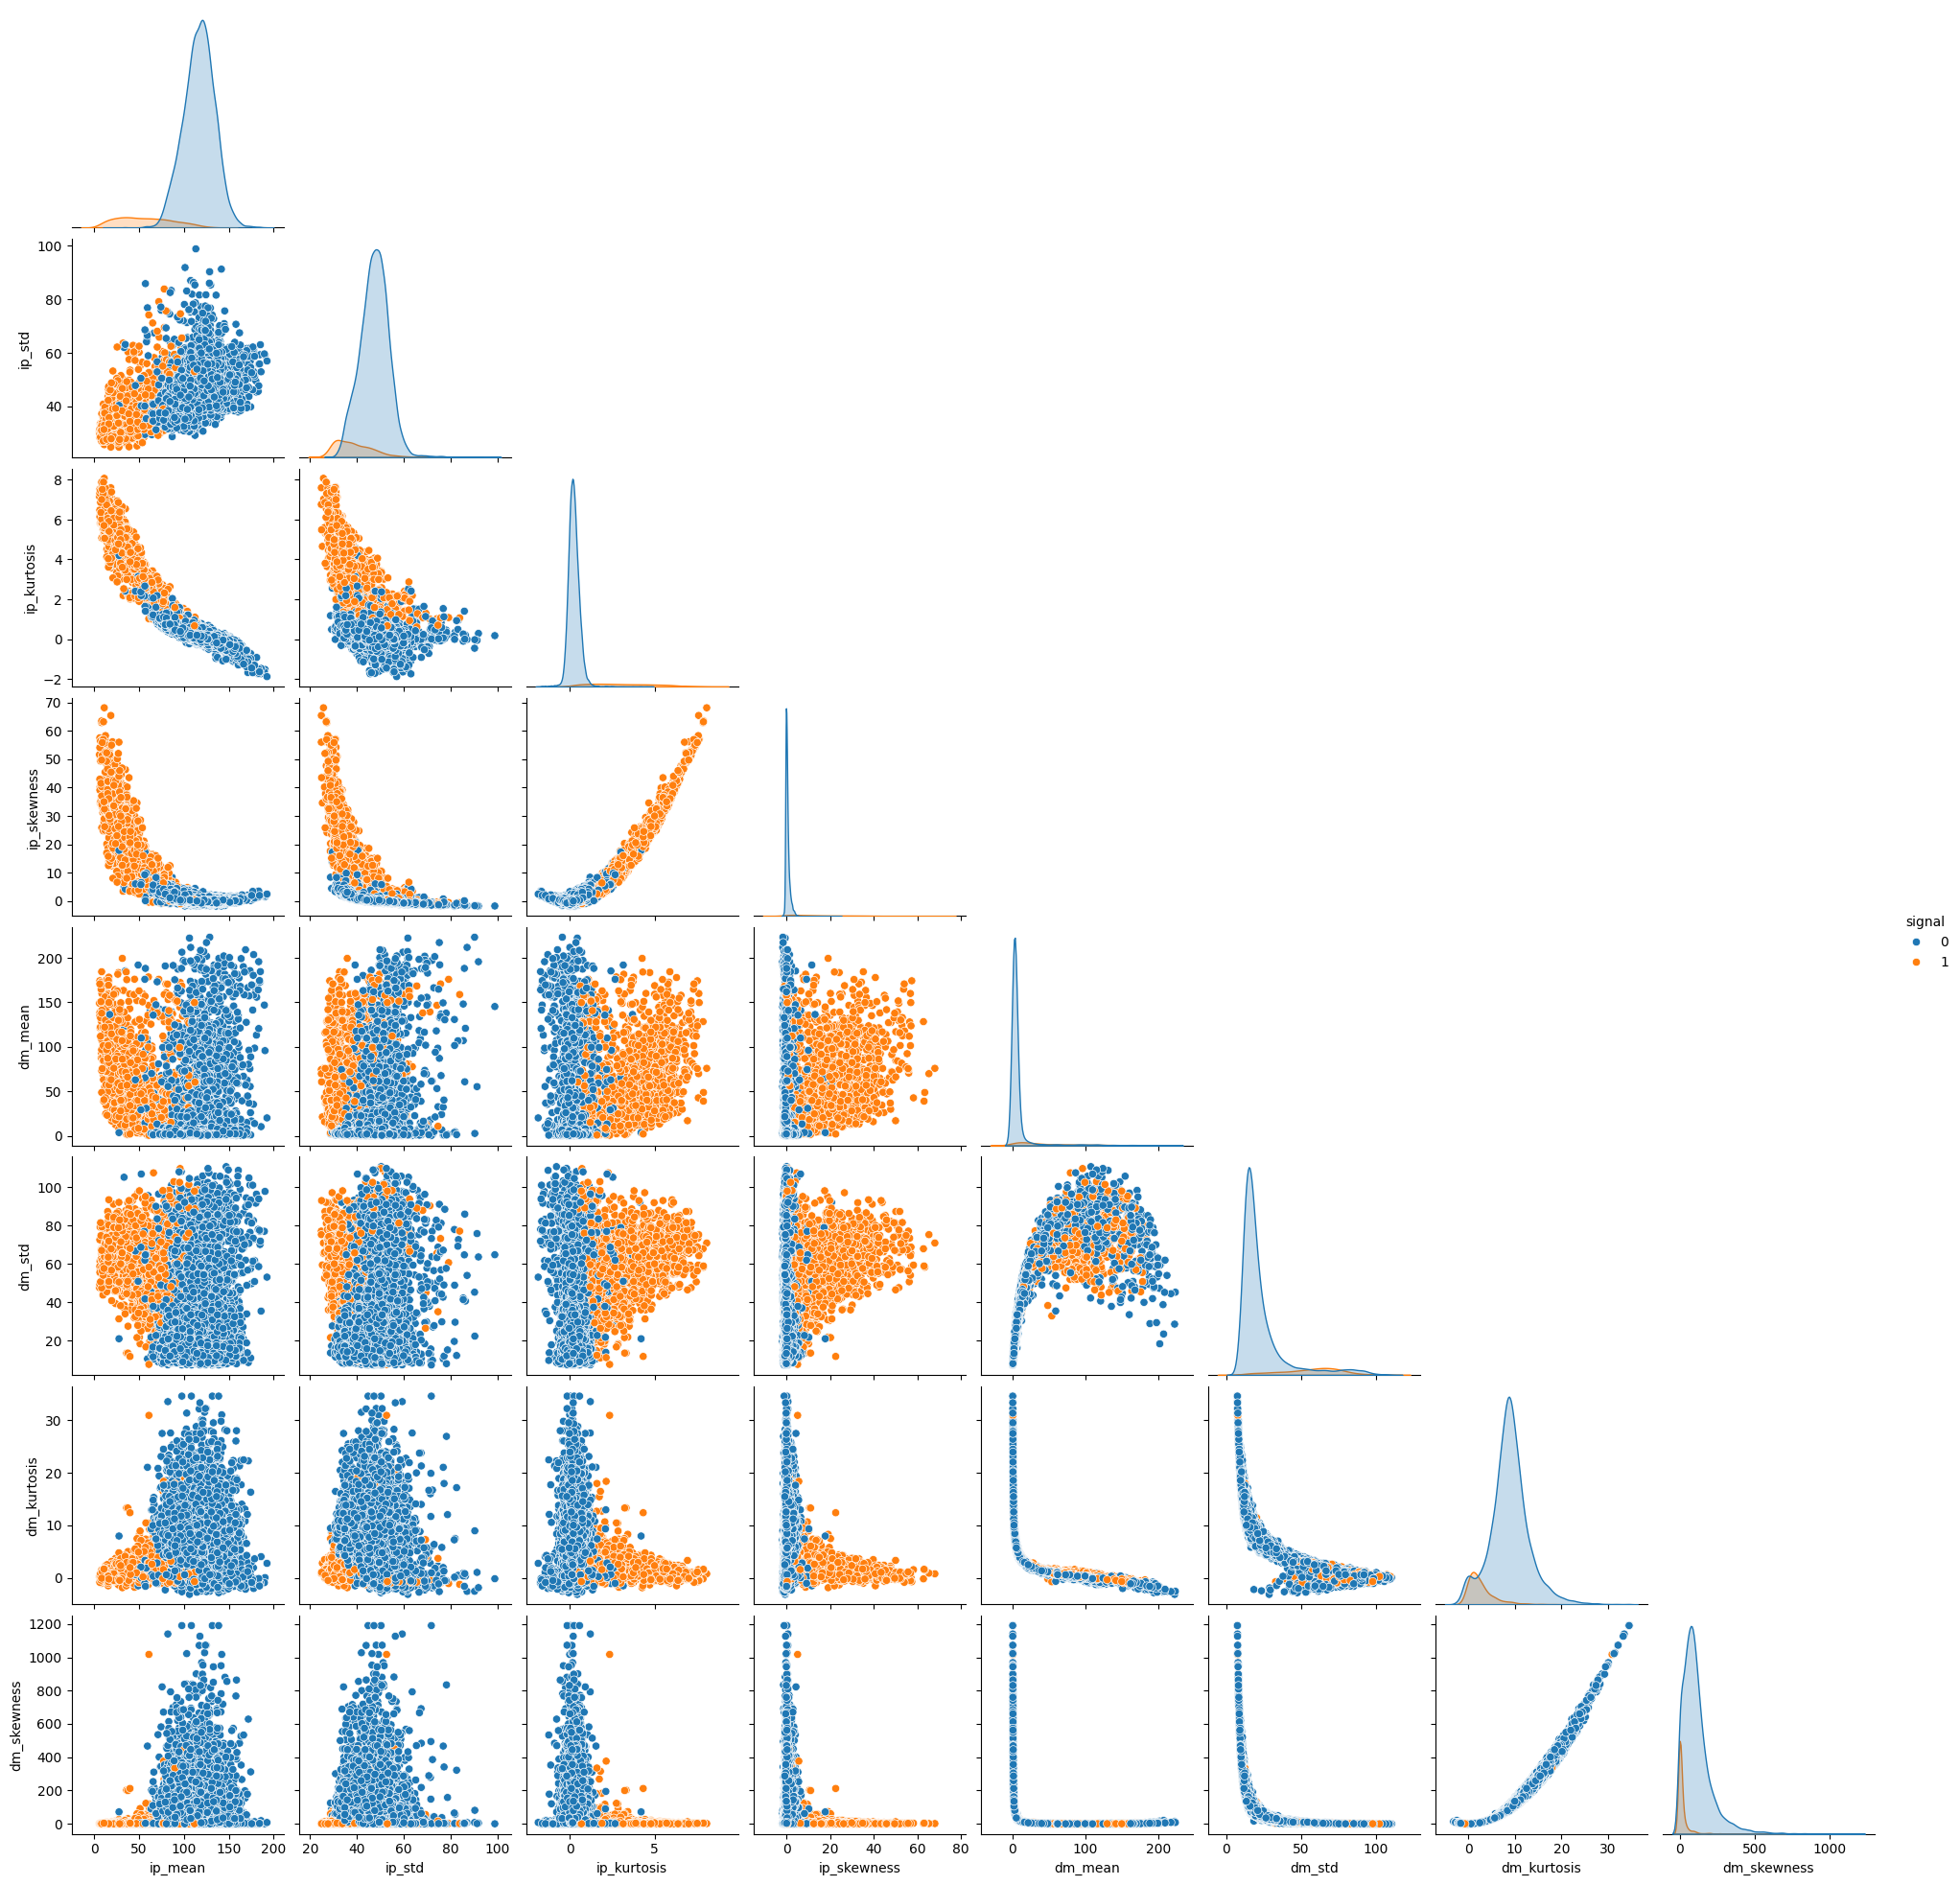

In [ ]:
# Pair plots of the numerical columns with signal indicator
sns.pairplot(df, hue='signal', corner=True)

In [ ]:
# Export cleaned data
data_handler.export_cleaned_data()